In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miroslavsabo/young-people-survey")

print("Path to dataset files:", path)

100%|██████████| 83.8k/83.8k [00:00<00:00, 533kB/s]

Extracting files...
Path to dataset files: /Users/georgijhabner/.cache/kagglehub/datasets/miroslavsabo/young-people-survey/versions/2


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [10]:
df = pd.read_csv(path + "/responses.csv")
df.head()

# def some(weight, height):
#     return weight /2 + height**2

# df.apply(lambda x: some(x["Weight"], x["Height"]), axis=1)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [5]:
df_group = df[:30].groupby("Gender")[["Height", "Weight"]].count()
print(df_group)

df_group = df[:30].groupby("Gender").agg({"Height": ["count", "sum", "mean"], "Weight": "count"})
print(df_group)

df_group = df[:30].groupby("Gender").agg(New_col=("Weight", "sum"))
df_group

        Height  Weight
Gender                
female      22      22
male         8       8
       Height                     Weight
        count     sum        mean  count
Gender                                  
female     22  3731.0  169.590909     22
male        8  1475.0  184.375000      8


,New_col
Gender,
female,1277.0
male,654.0


In [6]:
print(f'Number of rows: {df.shape[0]} and number of columns: {df.shape[1]}')

Number of rows: 1010 and number of columns: 150


In [7]:
target_mode = df['Smoking'].mode()[0]

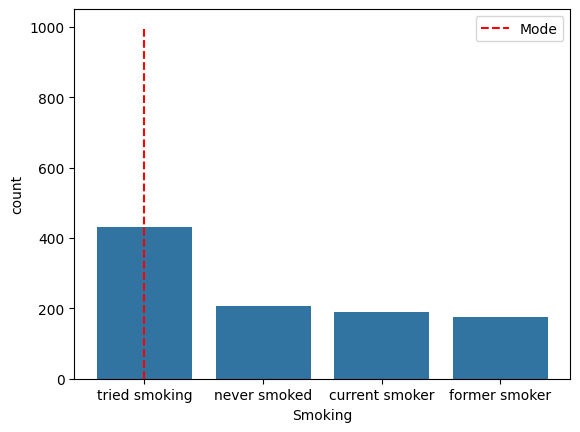

In [8]:
sns.countplot(x='Smoking', data=df, order = df['Smoking'].value_counts().index)

y = np.linspace(0, 1000, 1000)
plt.plot([target_mode]*1000, y, 'r--', label='Mode')
plt.legend()
plt.show()

In [9]:
df['Smoking'].isna().sum()

np.int64(8)

In [10]:
df['Smoking'].fillna(target_mode, inplace=True)

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/635326398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking'].fillna(target_mode, inplace=True)


In [11]:
df['Smoking'] = df['Smoking'].map({'never smoked': 0, 'tried smoking': 1, 'former smoker': 2, 'current smoker': 3})

#### 2. Анализ признаков

<Axes: >

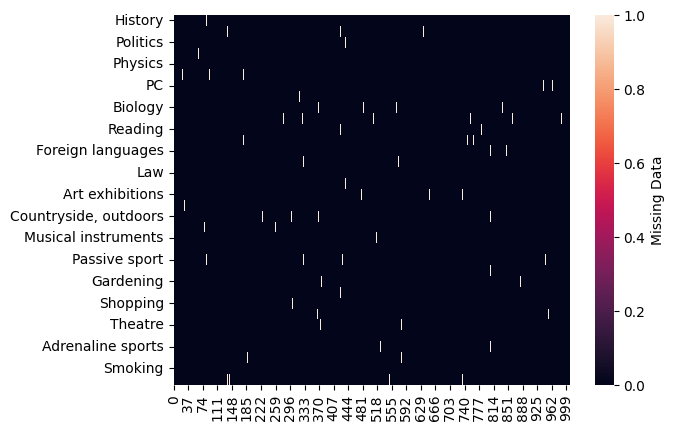

In [12]:
columns = ["History", "Psychology", "Politics", "Mathematics", "Physics", "Internet", "PC", "Economy Management", "Biology", "Chemistry", "Reading", "Geography", "Foreign languages", "Medicine", "Law", "Cars", "Art exhibitions", "Religion", "Countryside, outdoors", "Dancing", "Musical instruments", "Writing", "Passive sport", "Active sport", "Gardening", "Celebrities", "Shopping", "Science and technology", "Theatre", "Fun with friends", "Adrenaline sports", "Pets", "Smoking", "Age"]

df_data = df[columns]

sns.heatmap(df_data.isnull().transpose(), cbar_kws={'label': 'Missing Data'})

In [13]:
pd.set_option('display.max_rows',None)
df_data.isna().sum()

History                    2
Psychology                 5
Politics                   1
Mathematics                3
Physics                    3
Internet                   4
PC                         6
Economy Management         5
Biology                    6
Chemistry                 10
Reading                    6
Geography                  9
Foreign languages          5
Medicine                   5
Law                        1
Cars                       4
Art exhibitions            6
Religion                   3
Countryside, outdoors      7
Dancing                    3
Musical instruments        1
Writing                    6
Passive sport             15
Active sport               4
Gardening                  7
Celebrities                2
Shopping                   2
Science and technology     6
Theatre                    8
Fun with friends           4
Adrenaline sports          3
Pets                       4
Smoking                    0
Age                        7
dtype: int64

In [14]:
df_data.drop_duplicates(inplace=True)
df_data['Age'].fillna(df_data['Age'].median(), inplace=True)
df_data.fillna(df_data.mode(), inplace=True);

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/2233479059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop_duplicates(inplace=True)
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/2233479059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Age'].fillna(df_data['Age'].median(), inpl

#### 2.1. Количественные признаки

In [15]:
df_num_features = df_data['Age']

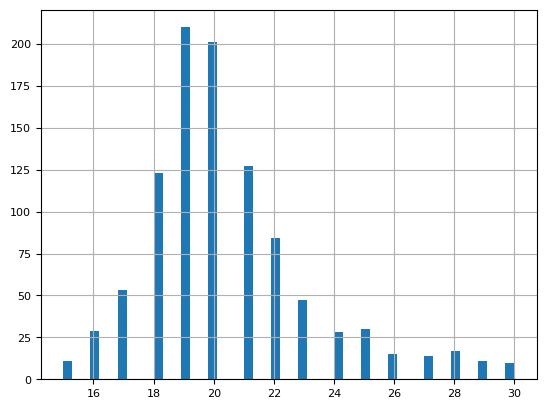

In [16]:
df_num_features.hist(bins=50, xlabelsize=8, ylabelsize=8);

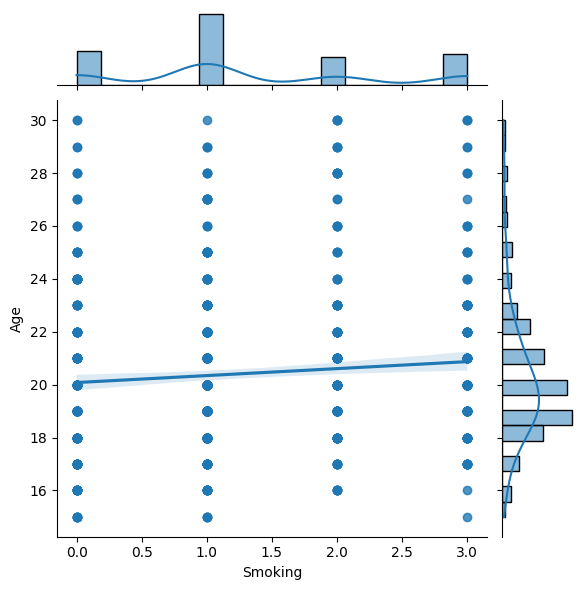

In [17]:
grid = sns.jointplot(x='Smoking', y='Age', data=df, kind='reg')



/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/1631305824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["is_smoker"] = df_data["Smoking"].apply(lambda x: 1 if x > 1 else 0)
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/1631305824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop('Smoking', axis=1, inplace=True)


<Figure size 1000x600 with 0 Axes>

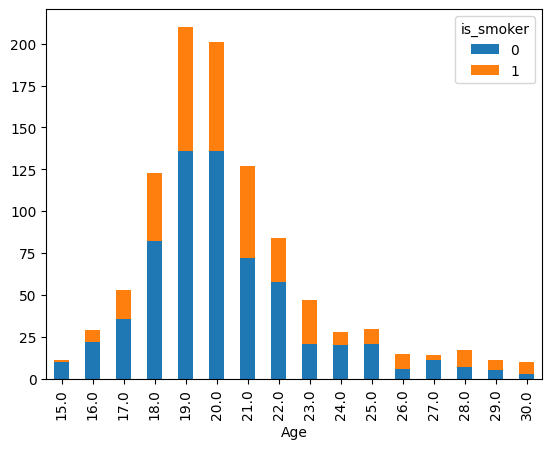

In [18]:
plt.figure(figsize=(10, 6))
df_data["is_smoker"] = df_data["Smoking"].apply(lambda x: 1 if x > 1 else 0)
df_data.groupby('Age')['is_smoker'].value_counts().unstack().plot(kind='bar', stacked=True)
df_data.drop('Smoking', axis=1, inplace=True)

#### 2.2 Категориальные признаки

In [19]:
classes_columns = ["History", "Psychology", "Mathematics", "Physics", "PC", "Economy Management", "Biology", "Chemistry", "Geography", "Foreign languages", "Medicine", "Law", "Science and technology"]
df_data["Love to study"] = round(df_data[classes_columns].mean(axis=1),0)
df_data[classes_columns + ["Love to study"]].head()

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/2432486169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["Love to study"] = round(df_data[classes_columns].mean(axis=1),0)


,History,Psychology,Mathematics,Physics,PC,Economy Management,Biology,Chemistry,Geography,Foreign languages,Medicine,Law,Science and technology,Love to study
0,1.0,5.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,5.0,3.0,1.0,4.0,3.0
1,1.0,3.0,5.0,2.0,4.0,5.0,1.0,1.0,4.0,5.0,1.0,2.0,3.0,3.0
2,1.0,2.0,5.0,2.0,2.0,4.0,1.0,1.0,2.0,5.0,2.0,3.0,2.0,2.0
3,4.0,4.0,4.0,1.0,1.0,2.0,3.0,3.0,4.0,4.0,2.0,5.0,3.0,3.0
4,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0


In [20]:
df_data.drop(columns=classes_columns, inplace=True)

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/3016986103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop(columns=classes_columns, inplace=True)


In [21]:
df_cat_features = df_data.select_dtypes(include=['number'])
df_cat_features = df_cat_features.drop(columns=['Age', 'is_smoker'])

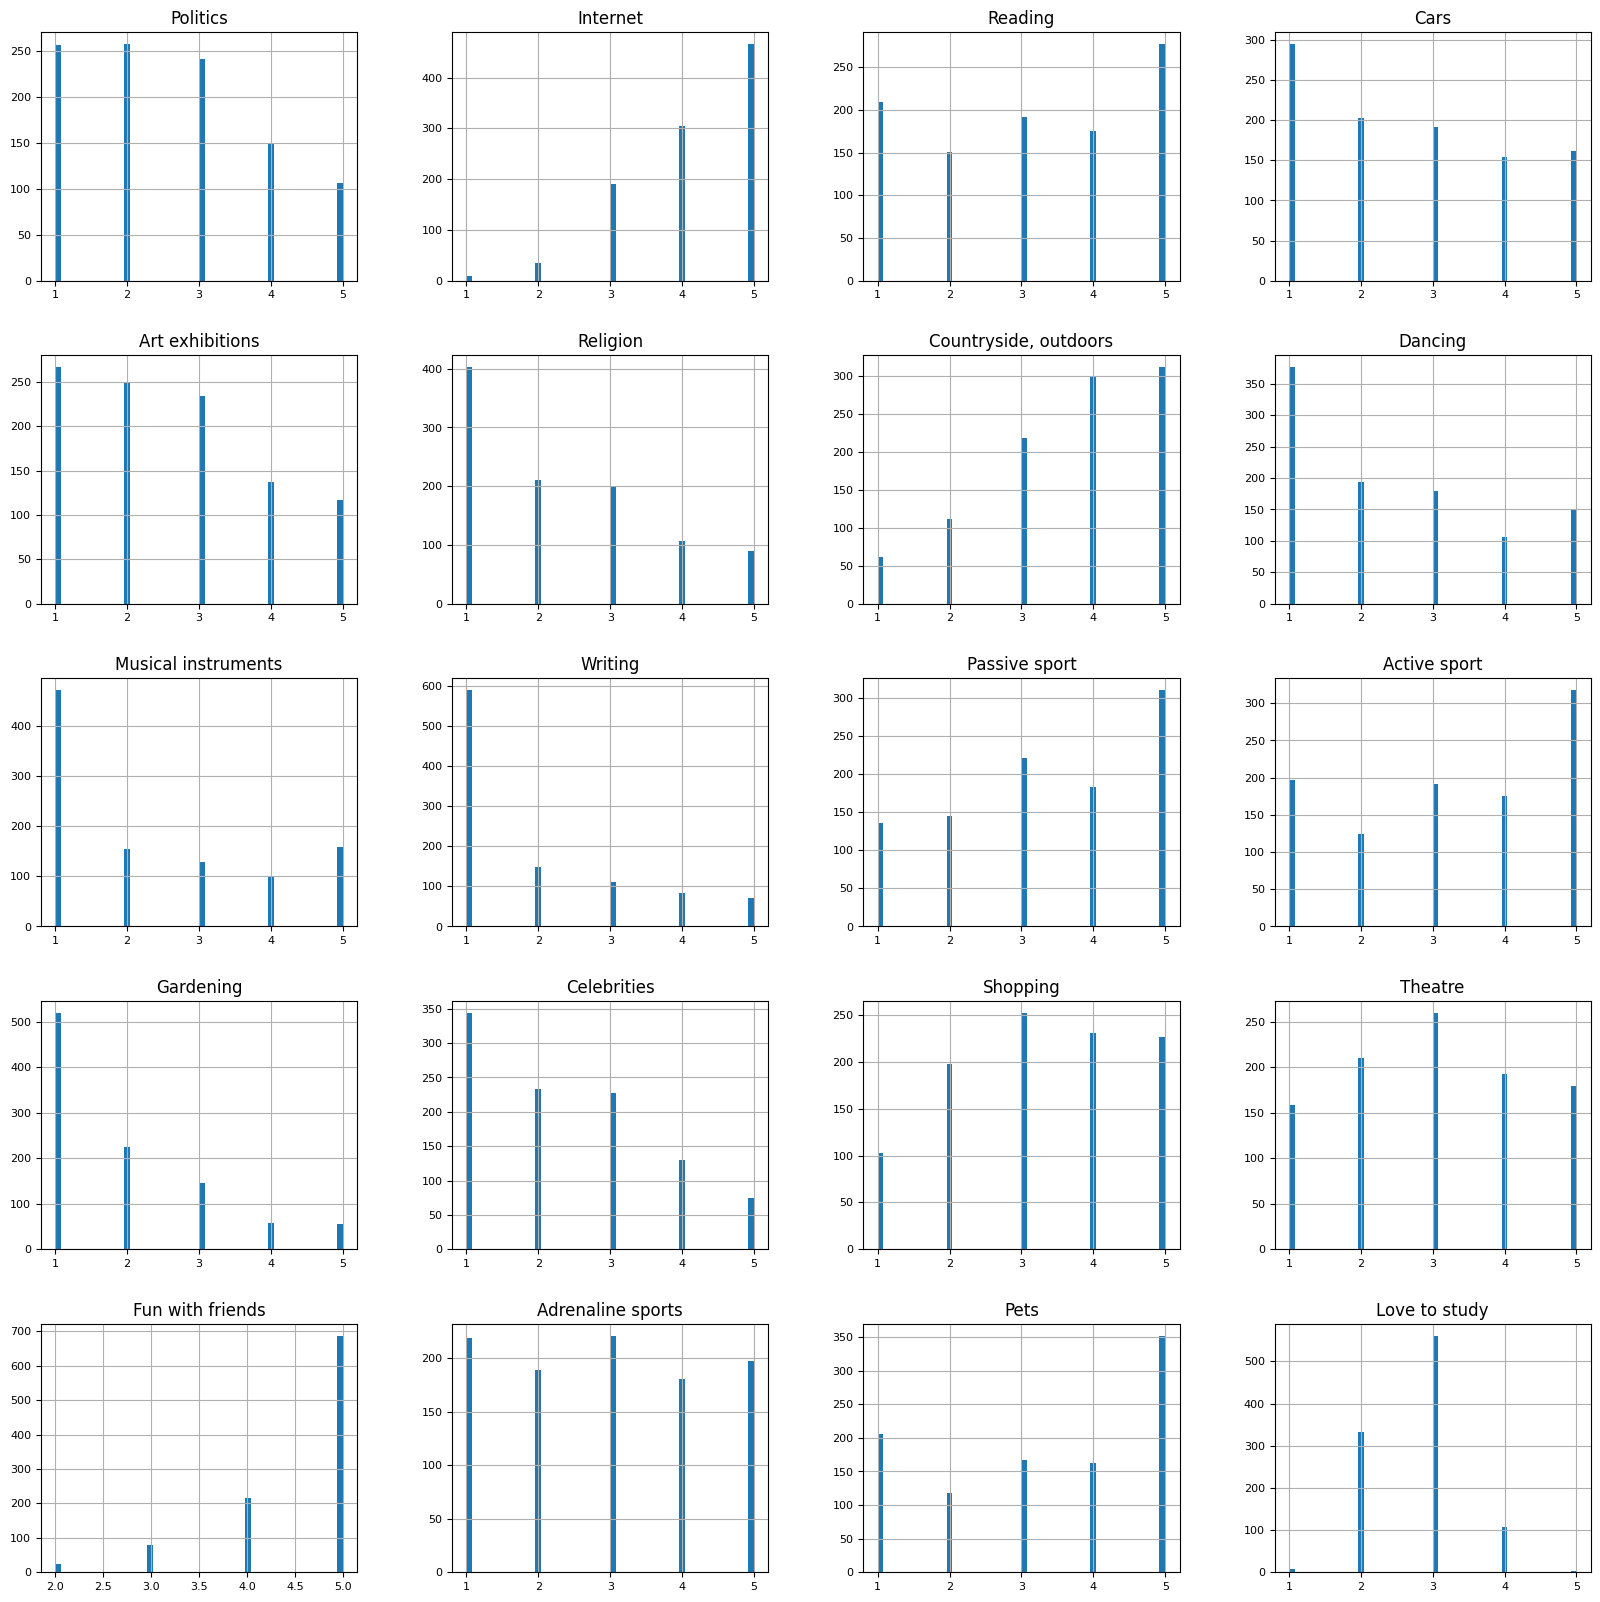

In [22]:
df_cat_features.hist(bins=50, xlabelsize=8, ylabelsize=8, figsize=(20, 20));

#### 2.3 Корреляционный анализ

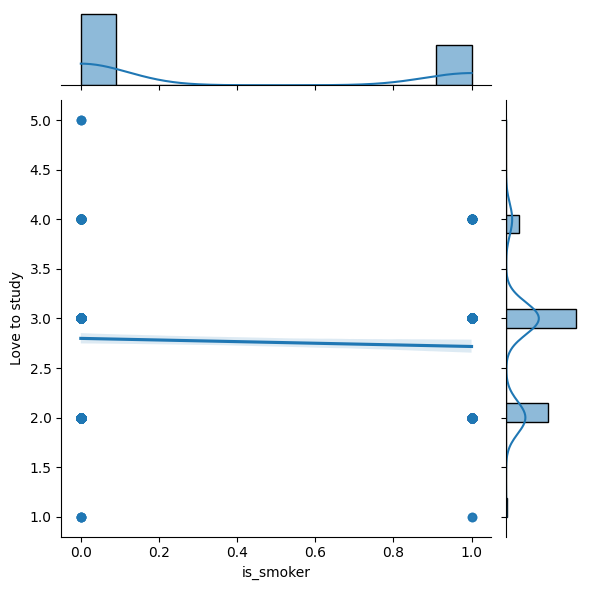

In [23]:
grid = sns.jointplot(x='is_smoker', y='Love to study', data=df_data, kind='reg')

<Axes: >

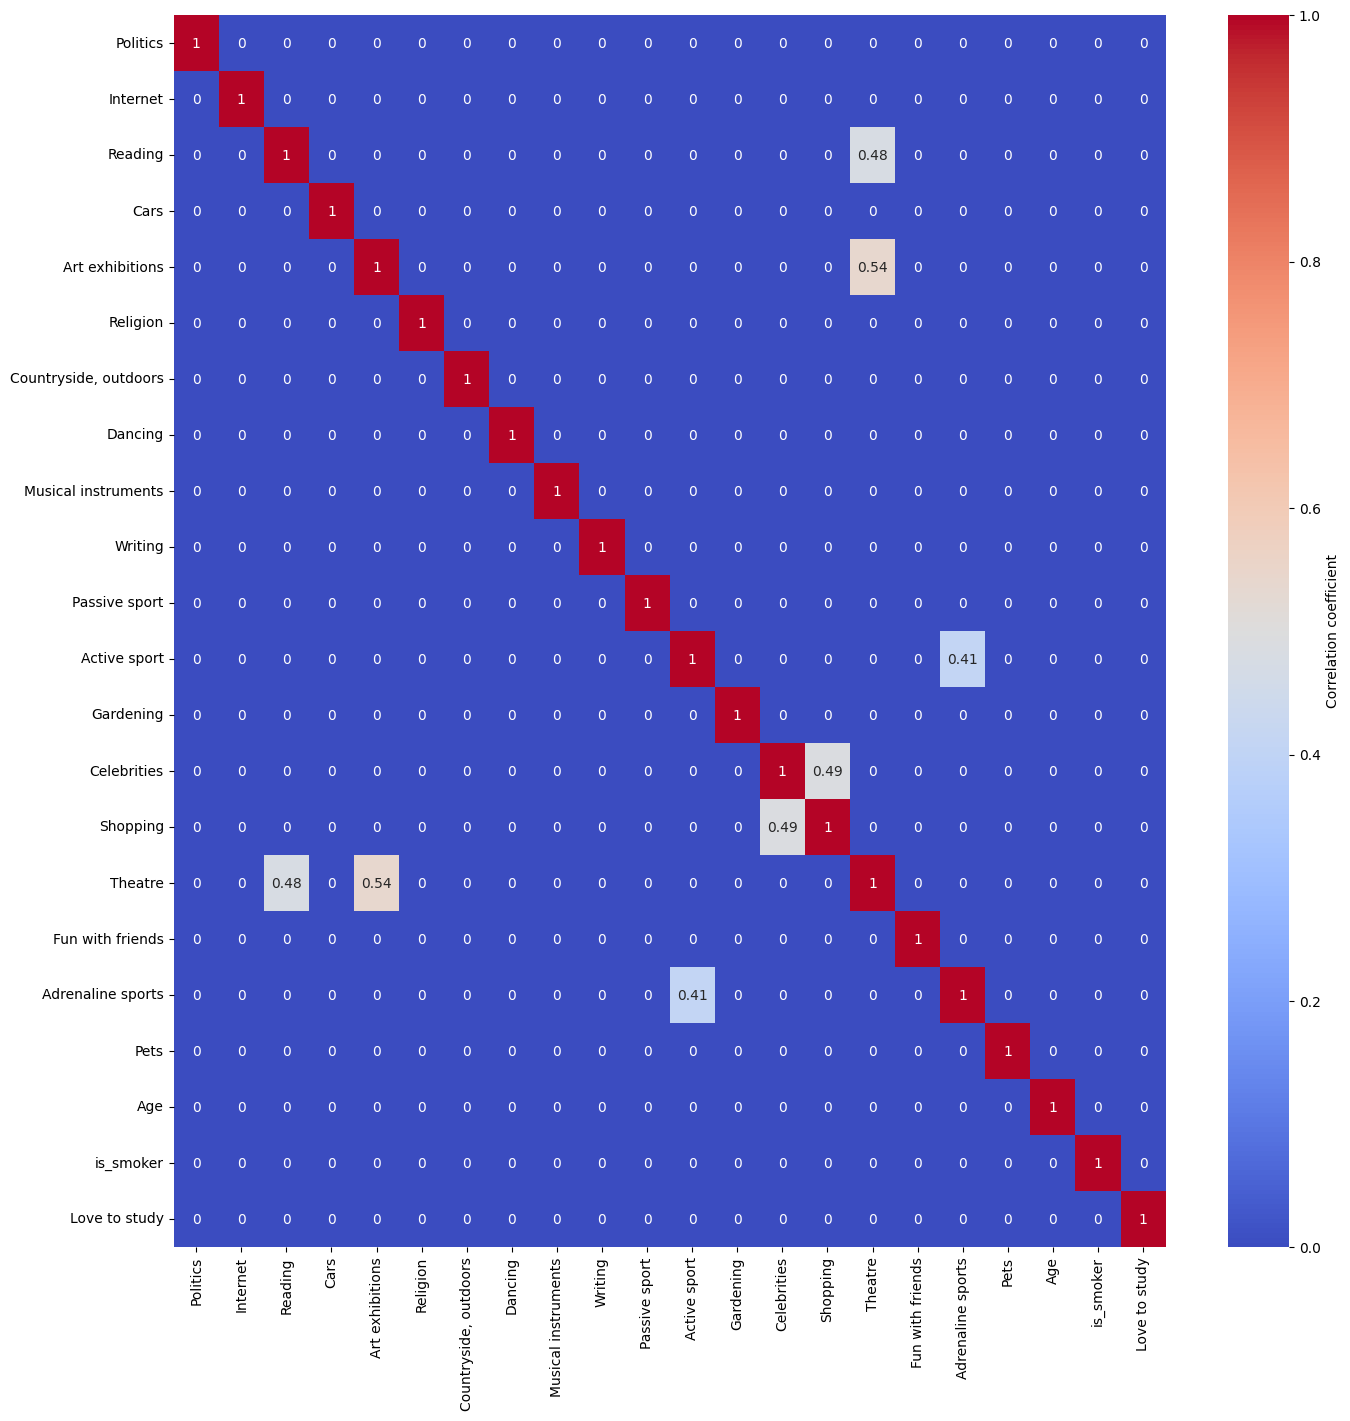

In [24]:
corr_matrix = df_data.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.4] = 0
plt.figure(figsize=(16, 16))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})

In [25]:
art_columns = ["Art exhibitions", "Reading", "Theatre"]
df_data["Art"] = round(df_data[art_columns].mean(axis=1),0)
df_data.drop(columns=art_columns, inplace=True)

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/979023906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["Art"] = round(df_data[art_columns].mean(axis=1),0)
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_79895/979023906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop(columns=art_columns, inplace=True)
